# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [1]:
! git clone https://github.com/Humzah-Syed/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 30 (delta 8), reused 4 (delta 4), pack-reused 18 (from 1)
Receiving objects: 100% (30/30), 31.69 KiB | 7.92 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Download complete
Extracting data files...
Data extracted


In [8]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv('./data/airbnb_NYC.csv', encoding = 'latin1')

# Look at the column
airbnb["Price"].head()



,Price
0,145
1,37
2,28
3,199
4,549


In [9]:
airbnb["Price_clean"] = (
    airbnb["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)


In [10]:

airbnb["Price_clean"] = pd.to_numeric(airbnb["Price_clean"], errors="coerce")

airbnb["Price_clean"].isna().sum()

np.int64(0)

In [11]:
# Because numbers with commas are stored as an object, the cleaning had to
# convert them column directly into numeric types. Cleaning led to all values
# to strings, removing commas, then reapplying the numeric type. After cleaning,
# there were zero missing values.

In [16]:
police = pd.read_csv('./data/mn_police_use_of_force.csv', encoding="latin1")

police["subject_injury"].value_counts(dropna=False)


,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [17]:
police["subject_injury_clean"] = police["subject_injury"].str.strip().str.title()

missing_prop = police["subject_injury_clean"].isna().mean()
missing_prop

np.float64(0.7619342359767892)

In [24]:
pd.crosstab(
    police["subject_injury_clean"],
    police["force_type"],
    dropna=False
)


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [25]:
police["subject_injury_clean"] = police["subject_injury_clean"].fillna("Missing")

1.2 About 76% of subject_injury values are missing. Cross-tabulation with force type shows clear patterns in what's missing. Some force types show more missing valeus than others, leading to the idea that injury reporting depends on the context of force used.


In [34]:
metabric = pd.read_csv('./data/metabric.csv', encoding="latin1")

metabric["survival_binary"] = metabric["Overall Survival Status"].map({
    "Deceased": 0,
    "Living": 1
})


In [36]:
metabric["Overall Survival Status"].value_counts()


,count
Overall Survival Status,
1:DECEASED,768
0:LIVING,575


In [37]:
metabric[["Overall Survival Status", "survival_binary"]].head()


,Overall Survival Status,survival_binary
0,0:LIVING,NaN
1,1:DECEASED,NaN
2,0:LIVING,NaN
3,1:DECEASED,NaN
4,1:DECEASED,NaN


In [28]:
airbnb["Review Scores Rating"].isna().sum()


np.int64(8323)

In [32]:
median_rating = airbnb["Review Scores Rating"].median()
median_rating



94.0

In [43]:
airbnb["Review Scores Rating_imputed"] = airbnb["Review Scores Rating"].fillna(median_rating)


In [45]:
airbnb["Review Scores Rating_imputed"].isna().sum()

np.int64(0)

Imputing missing review scores with the median makes the data easier to analyze, but it can reduce variation in the data. Listings with missing reviews may be new or lower quality, so using the median could make them look better than they actually are and affect the results.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [48]:
import pandas as pd
import numpy as np

sharks = pd.read_excel('./GSAF5.xls')


In [49]:
sharks.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
sharks = sharks.dropna(axis=1, how="all")
sharks.shape


(7074, 23)

An observation is one recorded shark attack involving a single person or incident. Each row represents one attack with details like year, type, and whether it was fatal. This affects cleaning and analysis because each row should describe one complete event, so I focused on cleaning variables within rows rather than combining or splitting rows.

In [53]:
sharks["Year"] = pd.to_numeric(sharks["Year"], errors="coerce")

sharks["Year"].describe()


,Year
count,7072.000000
mean,1936.004242
std,270.672015
min,0.000000
25%,1948.000000
50%,1987.000000
75%,2010.000000
max,2026.000000


In [63]:
sharks_recent = sharks[sharks["Year"] >= 1940].copy()


attacks_per_year = sharks_recent["Year"].value_counts().sort_index()
attacks_per_year.head()

,count
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31


<Axes: xlabel='Year'>

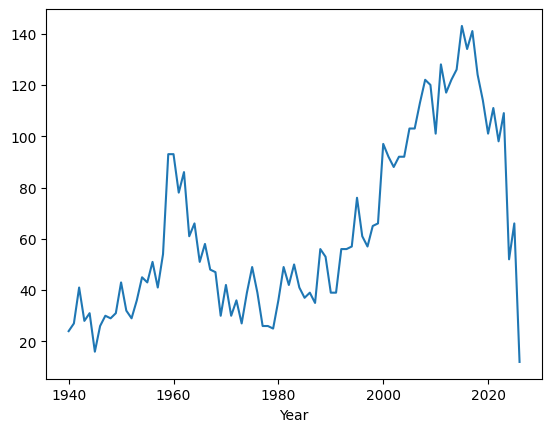

In [64]:
attacks_per_year.plot()


After filtering to attacks since 1940, the number of recorded shark attacks appears to increase over time. This is likely influenced by better reporting and increased human activity in the ocean rather than a true increase in shark aggression.

<Axes: >

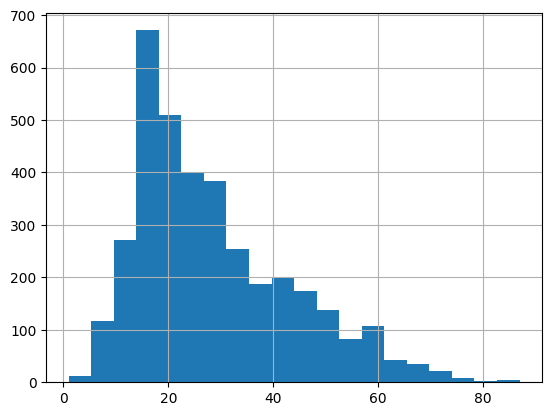

In [65]:
sharks_recent["Age"] = pd.to_numeric(sharks_recent["Age"], errors="coerce")
sharks_recent["Age"].dropna().hist(bins=20)


The Age variable was cleaned by converting it to numeric and setting invalid values to missing. The histogram shows that most victims are younger to middle-aged, with fewer attacks involving older individuals.

In [66]:
sharks_recent["Type_clean"] = sharks_recent["Type"].str.title()

sharks_recent["Type_clean"] = sharks_recent["Type_clean"].where(
    sharks_recent["Type_clean"].isin(["Provoked", "Unprovoked"]),
    "Unknown"
)

(sharks_recent["Type_clean"] == "Unprovoked").mean()


np.float64(0.7450343084145901)

About 75% of shark attacks are unprovoked. This suggests that most attacks happen without the person intentionally interacting with the shark.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about how data should be organized so it’s easier to work with. Wickham explains that a lot of time in data analysis is spent cleaning messy data, and he argues that having a standard structure, called “tidy data,” can make that process much easier. The paper focuses on how organizing data the right way helps with analysis and visualization.

2. The tidy data standard is meant to make data analysis less frustrating. When data follows a consistent structure, it works better with analysis tools and takes less effort to clean and reshape. The main goal is to help people spend more time analyzing data instead of constantly fixing its format.

3. "Like families, tidy datasets are all alike but every messy dataset is messy in its own way."

This means that tidy datasets all follow the same basic rules, so they tend to look similar. Unorganized datasets don't follow a standard pattern, and each one can be messy for a different reason, which makes them harder to clean.

"For a given dataset, it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

This means that when someone looks at one dataset, it's usually easy to tell what the rows and columns represent. But when you try to create definitions that work for every dataset, it becomes complicated because the same data can be structured or interpreted in different ways depending on the situation.

4. Values are the actual data points, like numbers or text. Variables are what the data is measuring, such as age or temperature. Observations are individual cases, like one person, one day, or one event.

5. Data is considered tidy when each variable has its own column, each observation has its own row, and each type of data is stored in its own table. This setup makes the data easier to understand and easier to analyze.

6. The paper lists five common issues: column headers that are actually values, multiple variables stored in one column, variables spread across rows and columns, different types of data mixed into one table, and one type of data split across multiple tables.

Table 4 is messy because the income ranges are stored as column names instead of being values in a single column. This makes it harder to analyze the data and breaks the tidy data rules.

Melting a dataset means turning columns into rows so that values that belong to the same variable are stored together. This helps convert messy data into a tidy format.

7. Table 11 is messy because the data is spread across many columns and rows in a way that mixes variables and values. Table 12 is tidy because the data has been melted so that each row represents one day and each variable has its own column, which makes the data much easier to work with.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gifts = pd.read_csv('./data/ForeignGifts_edu.csv', encoding = 'latin1')
gifts.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


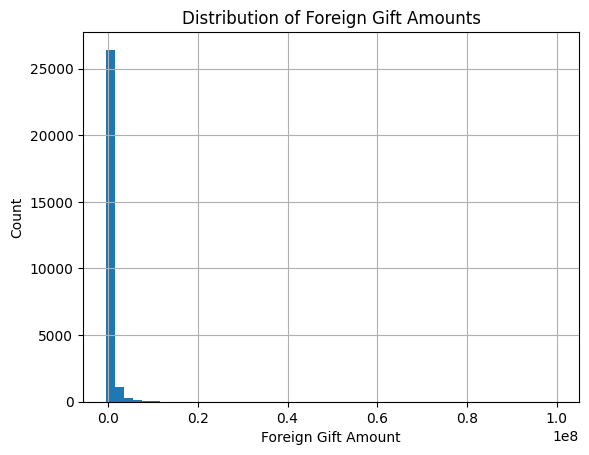

In [68]:
gifts["Foreign Gift Amount"].hist(bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

The distribution of foreign gift amounts is highly skewed to the right. Most gifts are relatively small, while a lesser number of gifts are extremely large. This suggests that a few very large donations make up a significant portion of the total funding.

In [69]:
gift_type_counts = gifts["Gift Type"].value_counts()
gift_type_counts


,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [70]:
gift_type_props = gifts["Gift Type"].value_counts(normalize=True)
gift_type_props


,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


Most foreign gifts are contracts, followed by monetary gifts, with real estate making up a much smaller proportion. This shows that foreign funding to U.S. universities is primarily given in the form of contracts rather than direct physical assets.

In [73]:
top_countries_count = (
    gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .count()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_count

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [74]:
top_countries_amount = (
    gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_amount



,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [76]:
top_institutions = (
    gifts.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_institutions


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

college = pd.read_csv('./data/college_completion.csv', encoding = 'latin1')
college.head()


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [78]:
college.shape


(3798, 63)

In [79]:
pd.crosstab(college["control"], college["level"])


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Public institutions are the only type to be more often than not 2-year institutions. For the other two, especially Private not-for-profit institutions, it's more common for them to be 4-year.

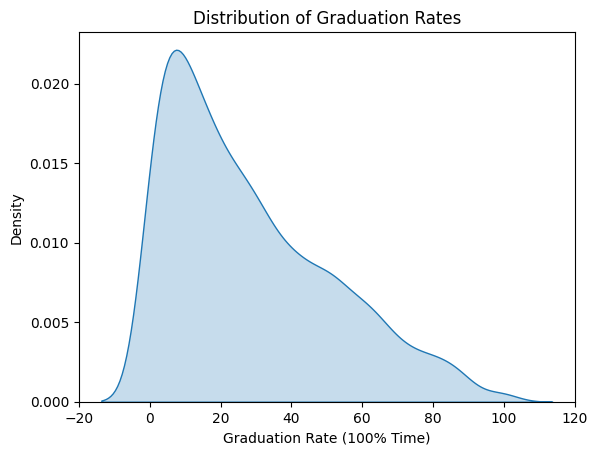

In [80]:
sns.kdeplot(college["grad_100_value"], fill=True)
plt.xlabel("Graduation Rate (100% Time)")
plt.title("Distribution of Graduation Rates")
plt.show()


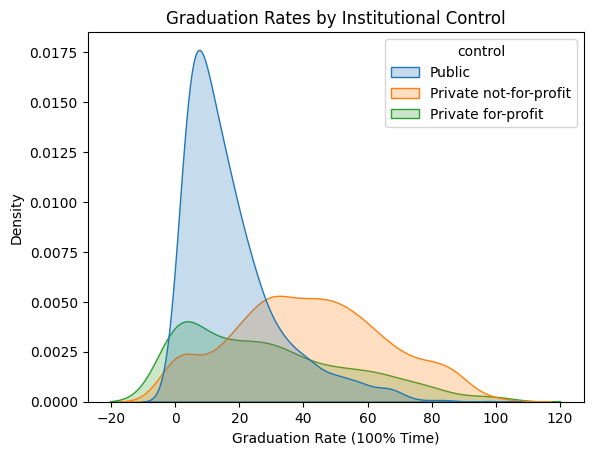

In [81]:
sns.kdeplot(
    data=college,
    x="grad_100_value",
    hue="control",
    fill=True
)
plt.xlabel("Graduation Rate (100% Time)")
plt.title("Graduation Rates by Institutional Control")
plt.show()


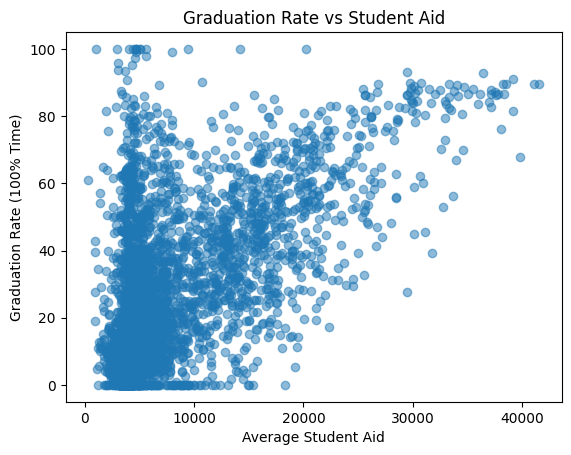

In [82]:
plt.scatter(college["aid_value"], college["grad_100_value"], alpha=0.5)
plt.xlabel("Average Student Aid")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs Student Aid")
plt.show()


In [83]:
college[["aid_value", "grad_100_value"]].cov()
college[["aid_value", "grad_100_value"]].corr()


,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


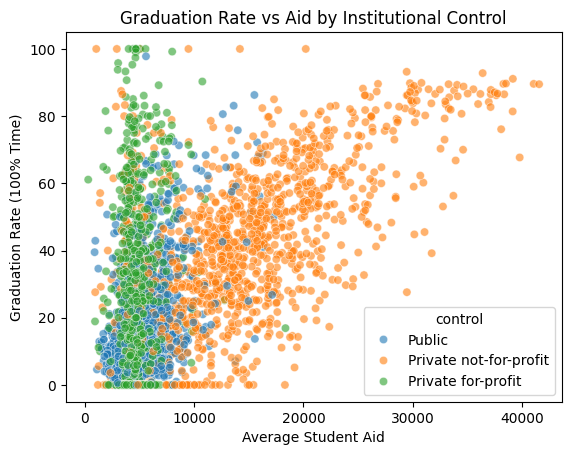

In [84]:
sns.scatterplot(
    data=college,
    x="aid_value",
    y="grad_100_value",
    hue="control",
    alpha=0.6
)
plt.xlabel("Average Student Aid")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs Aid by Institutional Control")
plt.show()


In [85]:
college.groupby("control")[["aid_value", "grad_100_value"]].corr()


aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

Looking at the big picture, graduation rates vary a lot across institutions. Private not-for-profit schools tend to have the highest graduation rates, while for-profit institutions tend to have lower rates. Student aid shows a weak positive relationship with graduation rates, especially for public and non-profit institutions, suggesting that financial support may help students complete their degrees.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ames = pd.read_csv('./data/ames_prices.csv', encoding = 'latin1')
ames.head()


,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


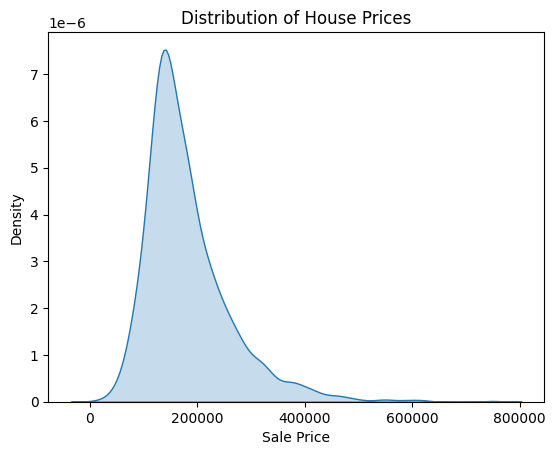

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In [89]:
sns.kdeplot(ames["price"], fill=True)
plt.xlabel("Sale Price")
plt.title("Distribution of House Prices")
plt.show()

ames["price"].describe()


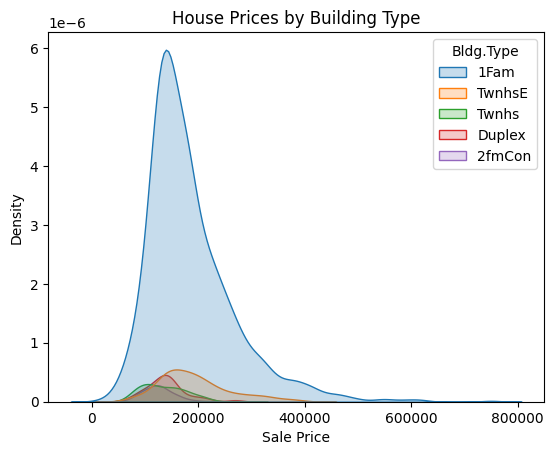

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [91]:
sns.kdeplot(
    data=ames,
    x="price",
    hue="Bldg.Type",
    fill=True
)
plt.xlabel("Sale Price")
plt.title("House Prices by Building Type")
plt.show()

ames.groupby("Bldg.Type")["price"].describe()


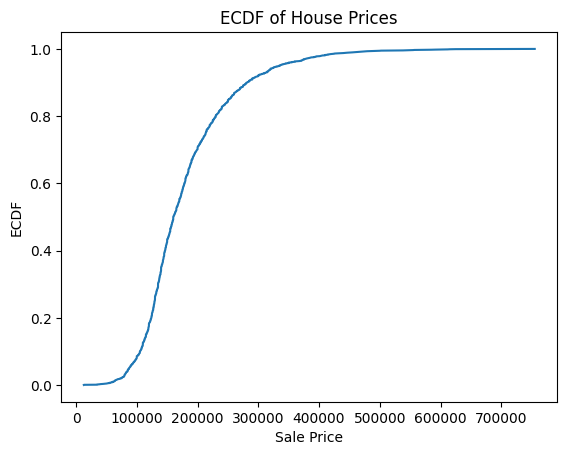

,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


In [94]:
sorted_prices = np.sort(ames["price"])
ecdf = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)

plt.plot(sorted_prices, ecdf)
plt.xlabel("Sale Price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices")
plt.show()

ames["price"].quantile([0, 0.25, 0.5, 0.75, 1.0])


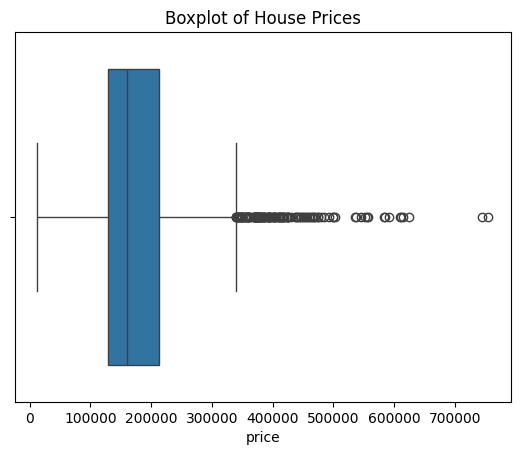

In [95]:
sns.boxplot(x=ames["price"])
plt.title("Boxplot of House Prices")
plt.show()


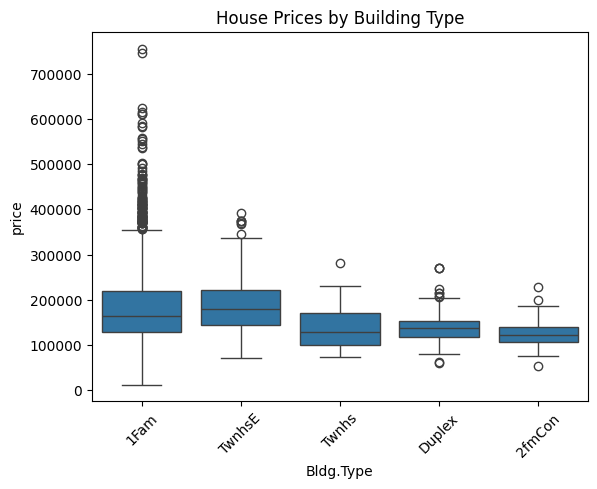

In [96]:
sns.boxplot(
    data=ames,
    x="Bldg.Type",
    y="price"
)
plt.xticks(rotation=45)
plt.title("House Prices by Building Type")
plt.show()


In [97]:
Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

ames["price_outlier"] = ((ames["price"] < lower) | (ames["price"] > upper)).astype(int)

ames["price_outlier"].value_counts()


,count
price_outlier,
0,2793
1,137


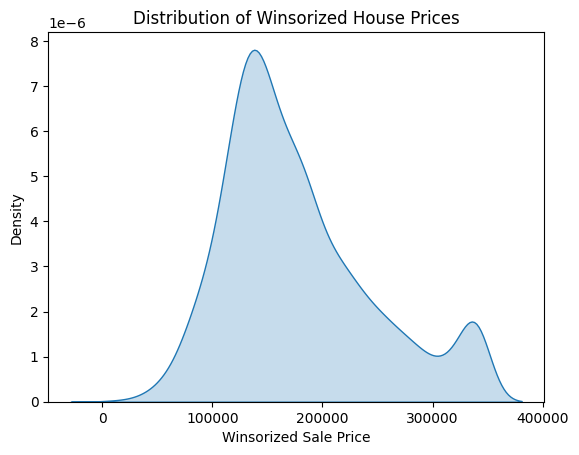

,price_winsorized
count,2930.000000
mean,177082.283959
std,67906.837135
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,339500.000000


In [98]:
ames["price_winsorized"] = ames["price"].clip(lower, upper)

sns.kdeplot(ames["price_winsorized"], fill=True)
plt.xlabel("Winsorized Sale Price")
plt.title("Distribution of Winsorized House Prices")
plt.show()

ames["price_winsorized"].describe()
